## Intital notes
1. Using the Health, Nutrition and Population Data and Statistics (HealthStats) from World Bank to explore patterns in infant mortality and under-5 mortality by country, region and in the context of the UN Millenium Goal to reduce childhood mortality by 2/3 in 2015
http://data.worldbank.org/data-catalog/health-nutrition-and-population-statistics


## Questions:
1. Which countries rates are not meeting the 2/3 reduction in mortality mandated by the UN Millenium Goals? 
2. Zambia and Zimbabwe are both in southern Africa and have a similar population size. But, Zambia's childhood mortality is dropping much more quickly based on 1990 and 2015 data. What does under-5 and infant related mortality look like for each country between 1960 or 2015? Does this provide any clues into the observed difference?
3. Infant mortality is a subset of overall childhood mortality. Are there countries where infant to under-5 mortality aren't strongly correlated? 

In [20]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

###  Data Processing
1. Create a dataframe from the original dataset that only includes Mortality rates for under-5 and infants
2. Create separate dataframes for regional data and country specific data

In [21]:
df = pd.read_csv('data.csv')

In [95]:
# Process the data to remove null values

# Count the number of values per row
for record in df:
  df['full_count'] = df.count(axis=1, level=None, numeric_only=False)
  
# Create a new Data Frame that only includes rows with >60 values and values for countries - not regional
df2 = df.ix[14145:, :]
df3 = df2.ix[lambda df2: df2['full_count'] > 60]


# Create a new Data frame that only includes indicators for Mortality rate under 5 and mortality rate infant
indicatorsInclude = ['Mortality rate, under-5 (per 1,000)', 'Mortality rate, infant (per 1,000 live births)']
df_mortality = df3.ix[lambda df3: df3['Indicator Name'].isin(indicatorsInclude),:]


df_under_5 = df_mortality.ix[lambda df_mortality: df_mortality['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)', :]
df_infant_mortality = df_mortality.ix[lambda df_mortality: df_mortality['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)', :]

# Get regional data only
df4 = df.ix[:14144, :]
df_regional = df4.ix[lambda df: df['full_count'] >60]
df_regional_under_5 = df_regional.ix[lambda df_regional: df_regional['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)',:]
df_regional_infant_mortality = df_regional.ix[lambda df_regional: df_regional['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)',:]


### Descriptive Statistics 
1. What are the mean, mode, median values of under 5 and infant mortality for all countries in 1990 and 2015
2. How much does mortality vary by country?


In [23]:
# Summary Statistics - Central Tendency

mean_child_mortality_1990 = df_under_5['1990'].mean()
median_child_mortality_1990 = np.median(df_under_5['1990'])
#mode_child_mortality_1990 = statistics.mode(df_under_5['1990'])
(values, counts) = np.unique(df_under_5['1990'], return_counts=True)
ind = np.argmax(counts)
mode_child_mortality_1990 = values[ind]


print("Mean Child Mortality in 1990:", mean_child_mortality_1990)
print("Median Child Mortality in 1990:", median_child_mortality_1990)
print("Mode Child Mortality in 1990", mode_child_mortality_1990)

mean_child_mortality_2015 = df_under_5['2015'].mean()
median_child_mortality_2015 = np.median(df_under_5['2015'])
(values2, counts2) = np.unique(df_under_5['2015'], return_counts=True)
ind = np.argmax(counts2)
mode_child_mortality_2015 = values2[ind]

print("Mean Child Mortality in 2015:", mean_child_mortality_2015)
print("Median Child Mortality in 2015", median_child_mortality_2015)
print("Mode Child Mortality in 2015", mode_child_mortality_2015)

Mean Child Mortality in 1990: 65.0071428571
Median Child Mortality in 1990: 40.65
Mode Child Mortality in 1990 8.3
Mean Child Mortality in 2015: 29.9153061224
Median Child Mortality in 2015 19.15
Mode Child Mortality in 2015 3.5


In [24]:
## Summary Statistics - Variance

var_child_mortality_1990 = np.var(df_under_5['1990'])
std_child_mortality_1990 = np.std(df_under_5['1990'], ddof=1)
print("Variance Child Mortality in 1990:", var_child_mortality_1990)
print("Standard Deviation Child Mortality in 2015", std_child_mortality_1990)

var_child_mortality_2015 = np.var(df_under_5['2015'])
std_child_mortality_2015 = np.std(df_under_5['2015'], ddof=1)
print("Variance Child Mortality in 2015:",var_child_mortality_2015)
print("Standard Deviation Child Mortality in 2015:", std_child_mortality_2015)

Variance Child Mortality in 1990: 3751.63331633
Standard Deviation Child Mortality in 2015 61.5654931634
Variance Child Mortality in 2015: 871.073949396
Standard Deviation Child Mortality in 2015: 29.6657056751


(array([ -50.,    0.,   50.,  100.,  150.,  200.,  250.]),
 <a list of 7 Text yticklabel objects>)

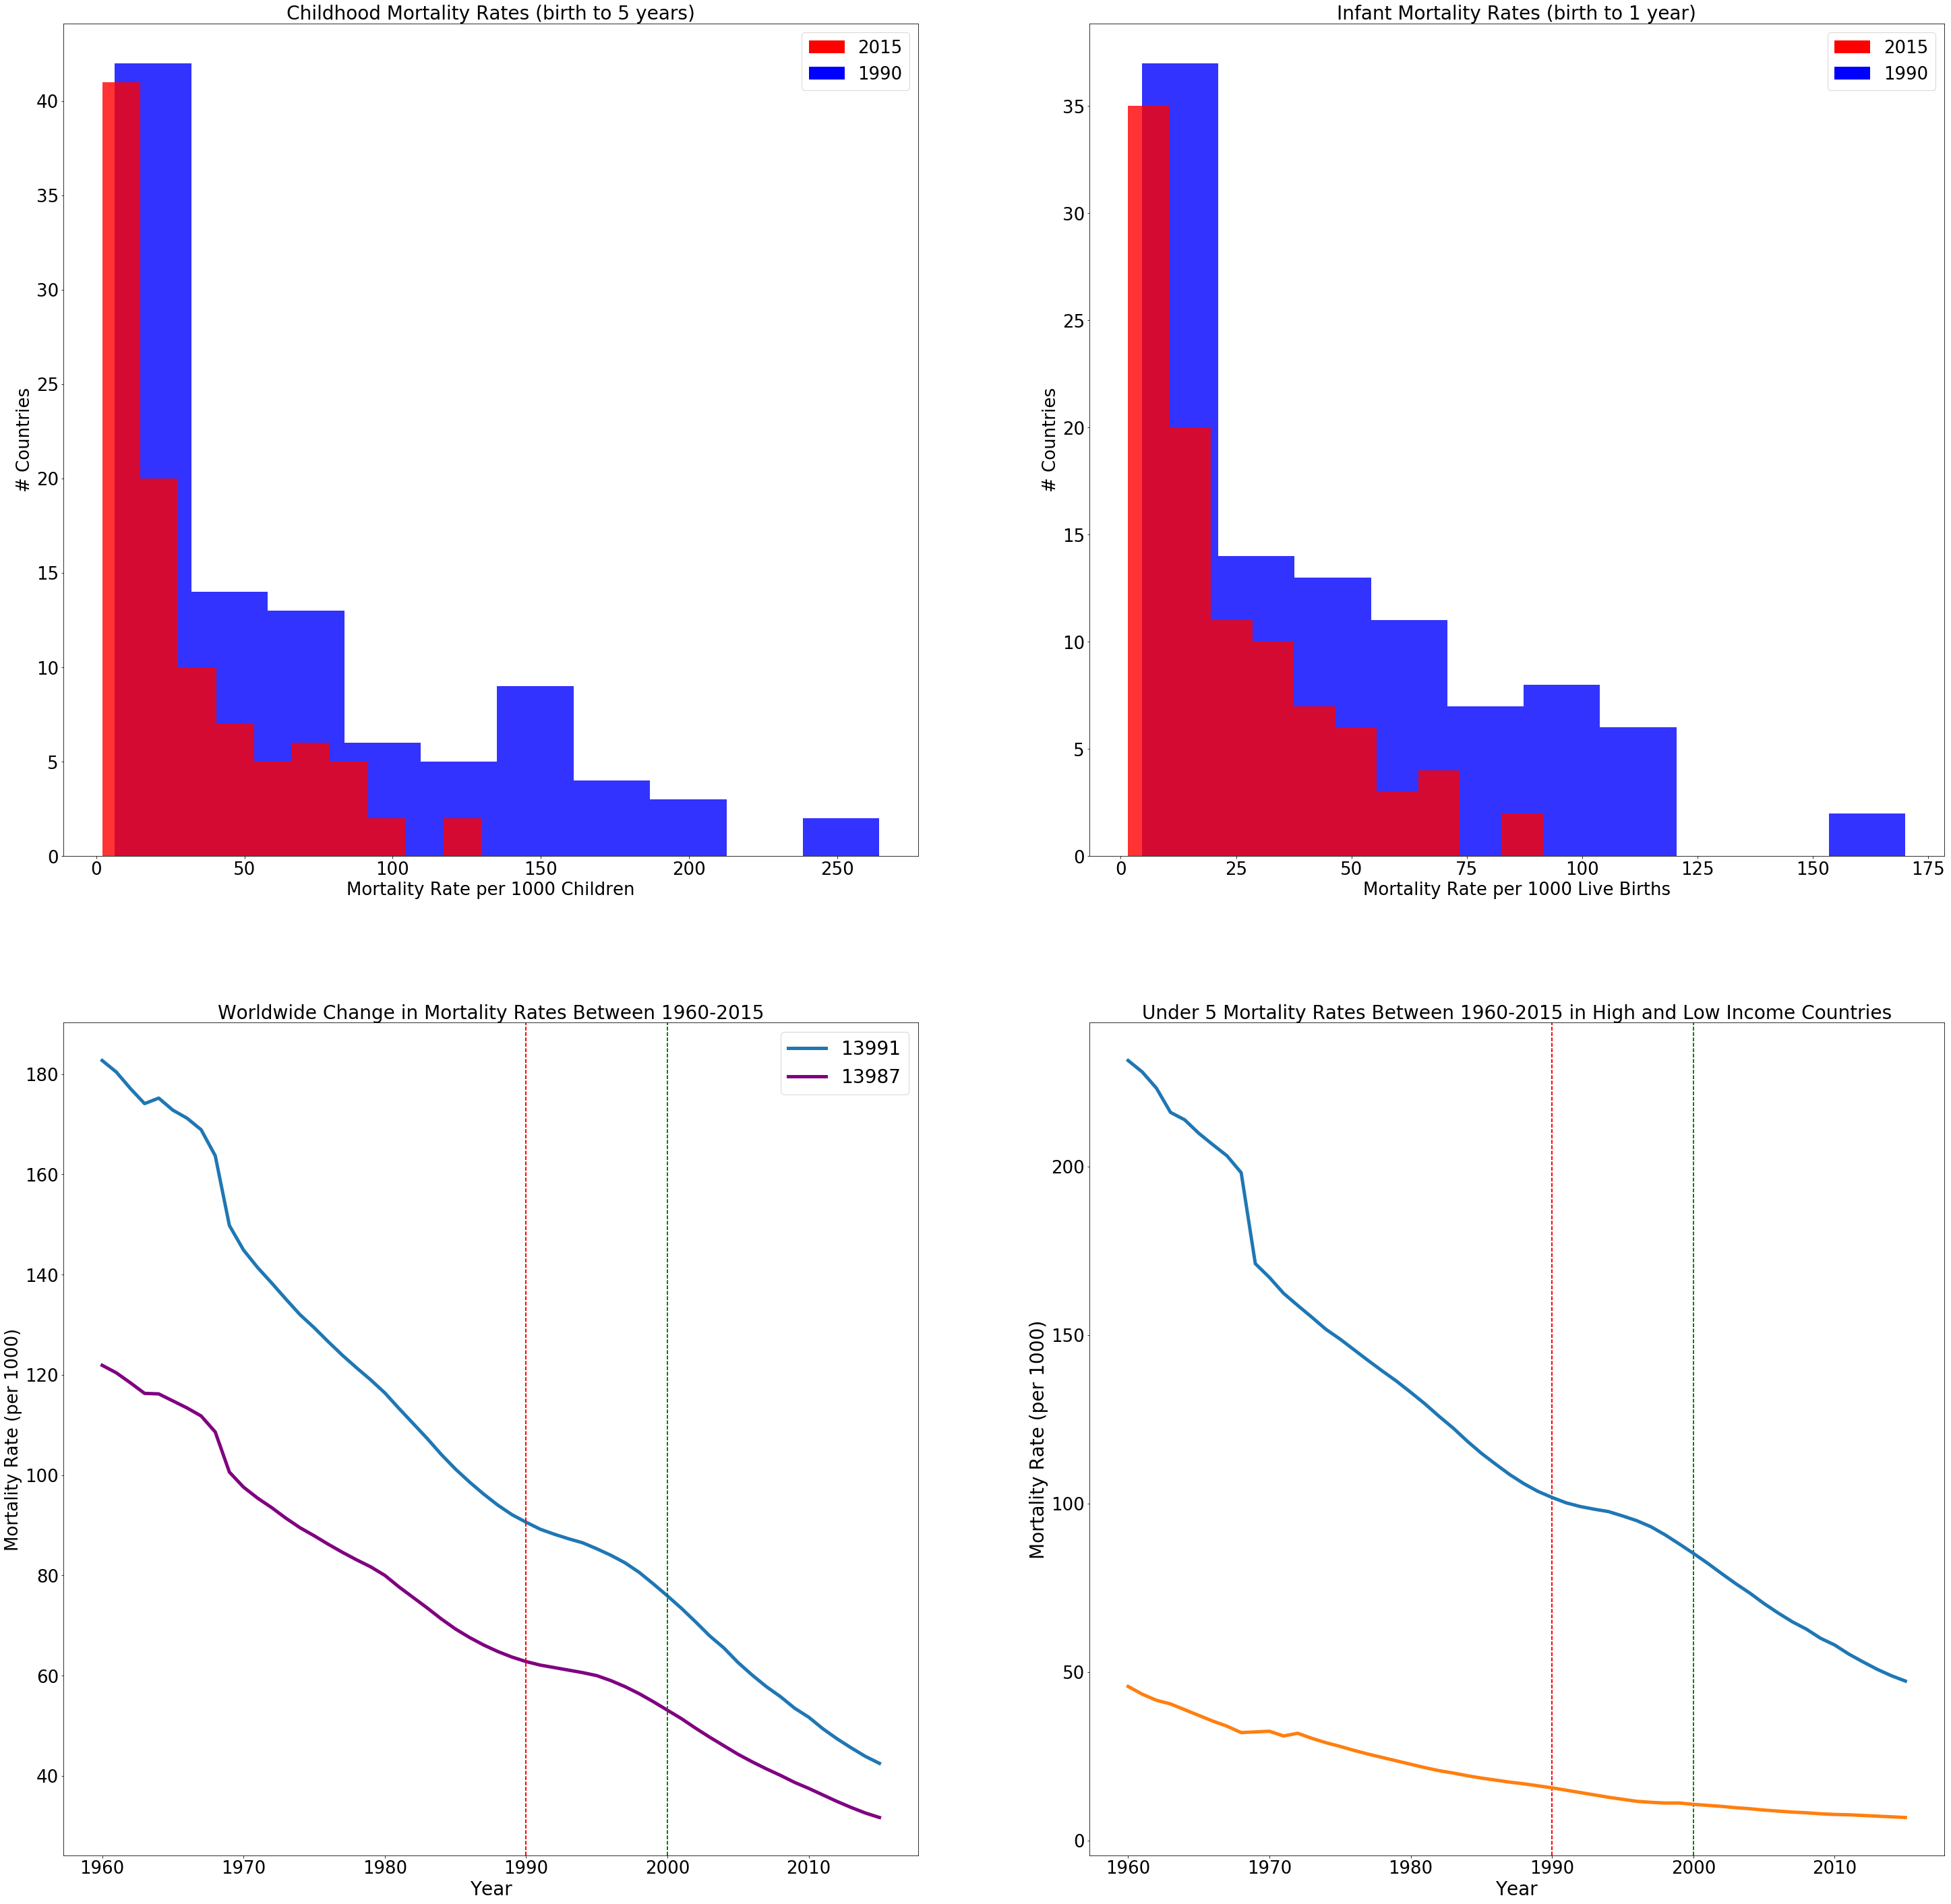

In [112]:
plt.figure(figsize=(50,50))


df_regional_under_5_limited = df_regional_under_5.drop(['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'full_count'], axis=1)
df_world_under_5 = df_regional_under_5_limited.ix[13991]


df_regional_infant_mortality_limited = df_regional_infant_mortality.drop(['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'full_count'], axis=1)
df_world_infant = df_regional_infant_mortality_limited.ix[13987]


plt.subplot(2,2,1)
plt.hist(x = df_under_5['1990'],color='blue', alpha=0.8)
plt.ylabel('# Countries', fontsize=26)
plt.xlabel('Mortality Rate per 1000 Children', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.hist(x = df_under_5['2015'],color='red', alpha=0.8)
plt.title('Childhood Mortality Rates (birth to 5 years)', fontsize=28)

blue_patch = mpatches.Patch(color='blue', label='1990')
red_patch = mpatches.Patch(color='red', label='2015')

plt.legend(handles=[red_patch,blue_patch], fontsize=26)

plt.subplot(2,2,2)
plt.hist(x = df_infant_mortality['1990'],color='blue', alpha=0.8)
plt.title('Infant Mortality Rates (birth to 1 year)', fontsize=28)
plt.ylabel('# Countries', fontsize=26)
plt.xlabel('Mortality Rate per 1000 Live Births', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.hist(x = df_infant_mortality['2015'],color='red', alpha=0.8)
blue_patch = mpatches.Patch(color='blue', label='1990')
red_patch = mpatches.Patch(color='red', label='2015')
plt.legend(handles=[red_patch,blue_patch],fontsize=26)


plt.subplot(2,2,3)

#plot line graph of mortality rate under_5,infant world add lines at 1990 and 2015
plt.plot(df_world_under_5, linewidth=5)
plt.plot(df_world_infant, linewidth=5, color='purple')
plt.title('Worldwide Change in Mortality Rates Between 1960-2015', fontsize=28)
plt.ylabel('Mortality Rate (per 1000)', fontsize=26)
plt.legend(fontsize=28)
plt.xlabel('Year', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.axvline(x=1990, linewidth=2, linestyle='dashed',color = 'r')
plt.axvline(x=2000, linewidth=2, linestyle='dashed',color = 'g')


plt.subplot(2,2,4)
df_low_income = df_regional_under_5.ix[lambda df_regional_under_5: df_regional_under_5['Country Name'] == 'Low & middle income',:]
df_high_income = df_regional_under_5.ix[lambda df_regional_under_5: df_regional_under_5['Country Name'] == 'High income',:]
df_low_income2 = df_low_income.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','full_count'], axis =1)
df_high_income2 = df_high_income.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','full_count'], axis =1)
df_low_income3 = df_low_income2.T
df_high_income3 = df_high_income2.T

plt.axvline(x=1990, linewidth=2, linestyle='dashed',color = 'r')
plt.axvline(x=2000, linewidth=2, linestyle='dashed',color = 'g')

plt.plot(df_low_income3, linewidth=5)
plt.plot(df_high_income3, linewidth=5)
plt.title('Under 5 Mortality Rates Between 1960-2015 in High and Low Income Countries', fontsize=28)
plt.ylabel('Mortality Rate (per 1000)', fontsize=28)
plt.xlabel('Year', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)


## 1. Which countries are not meeting the Millenium Goals


c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


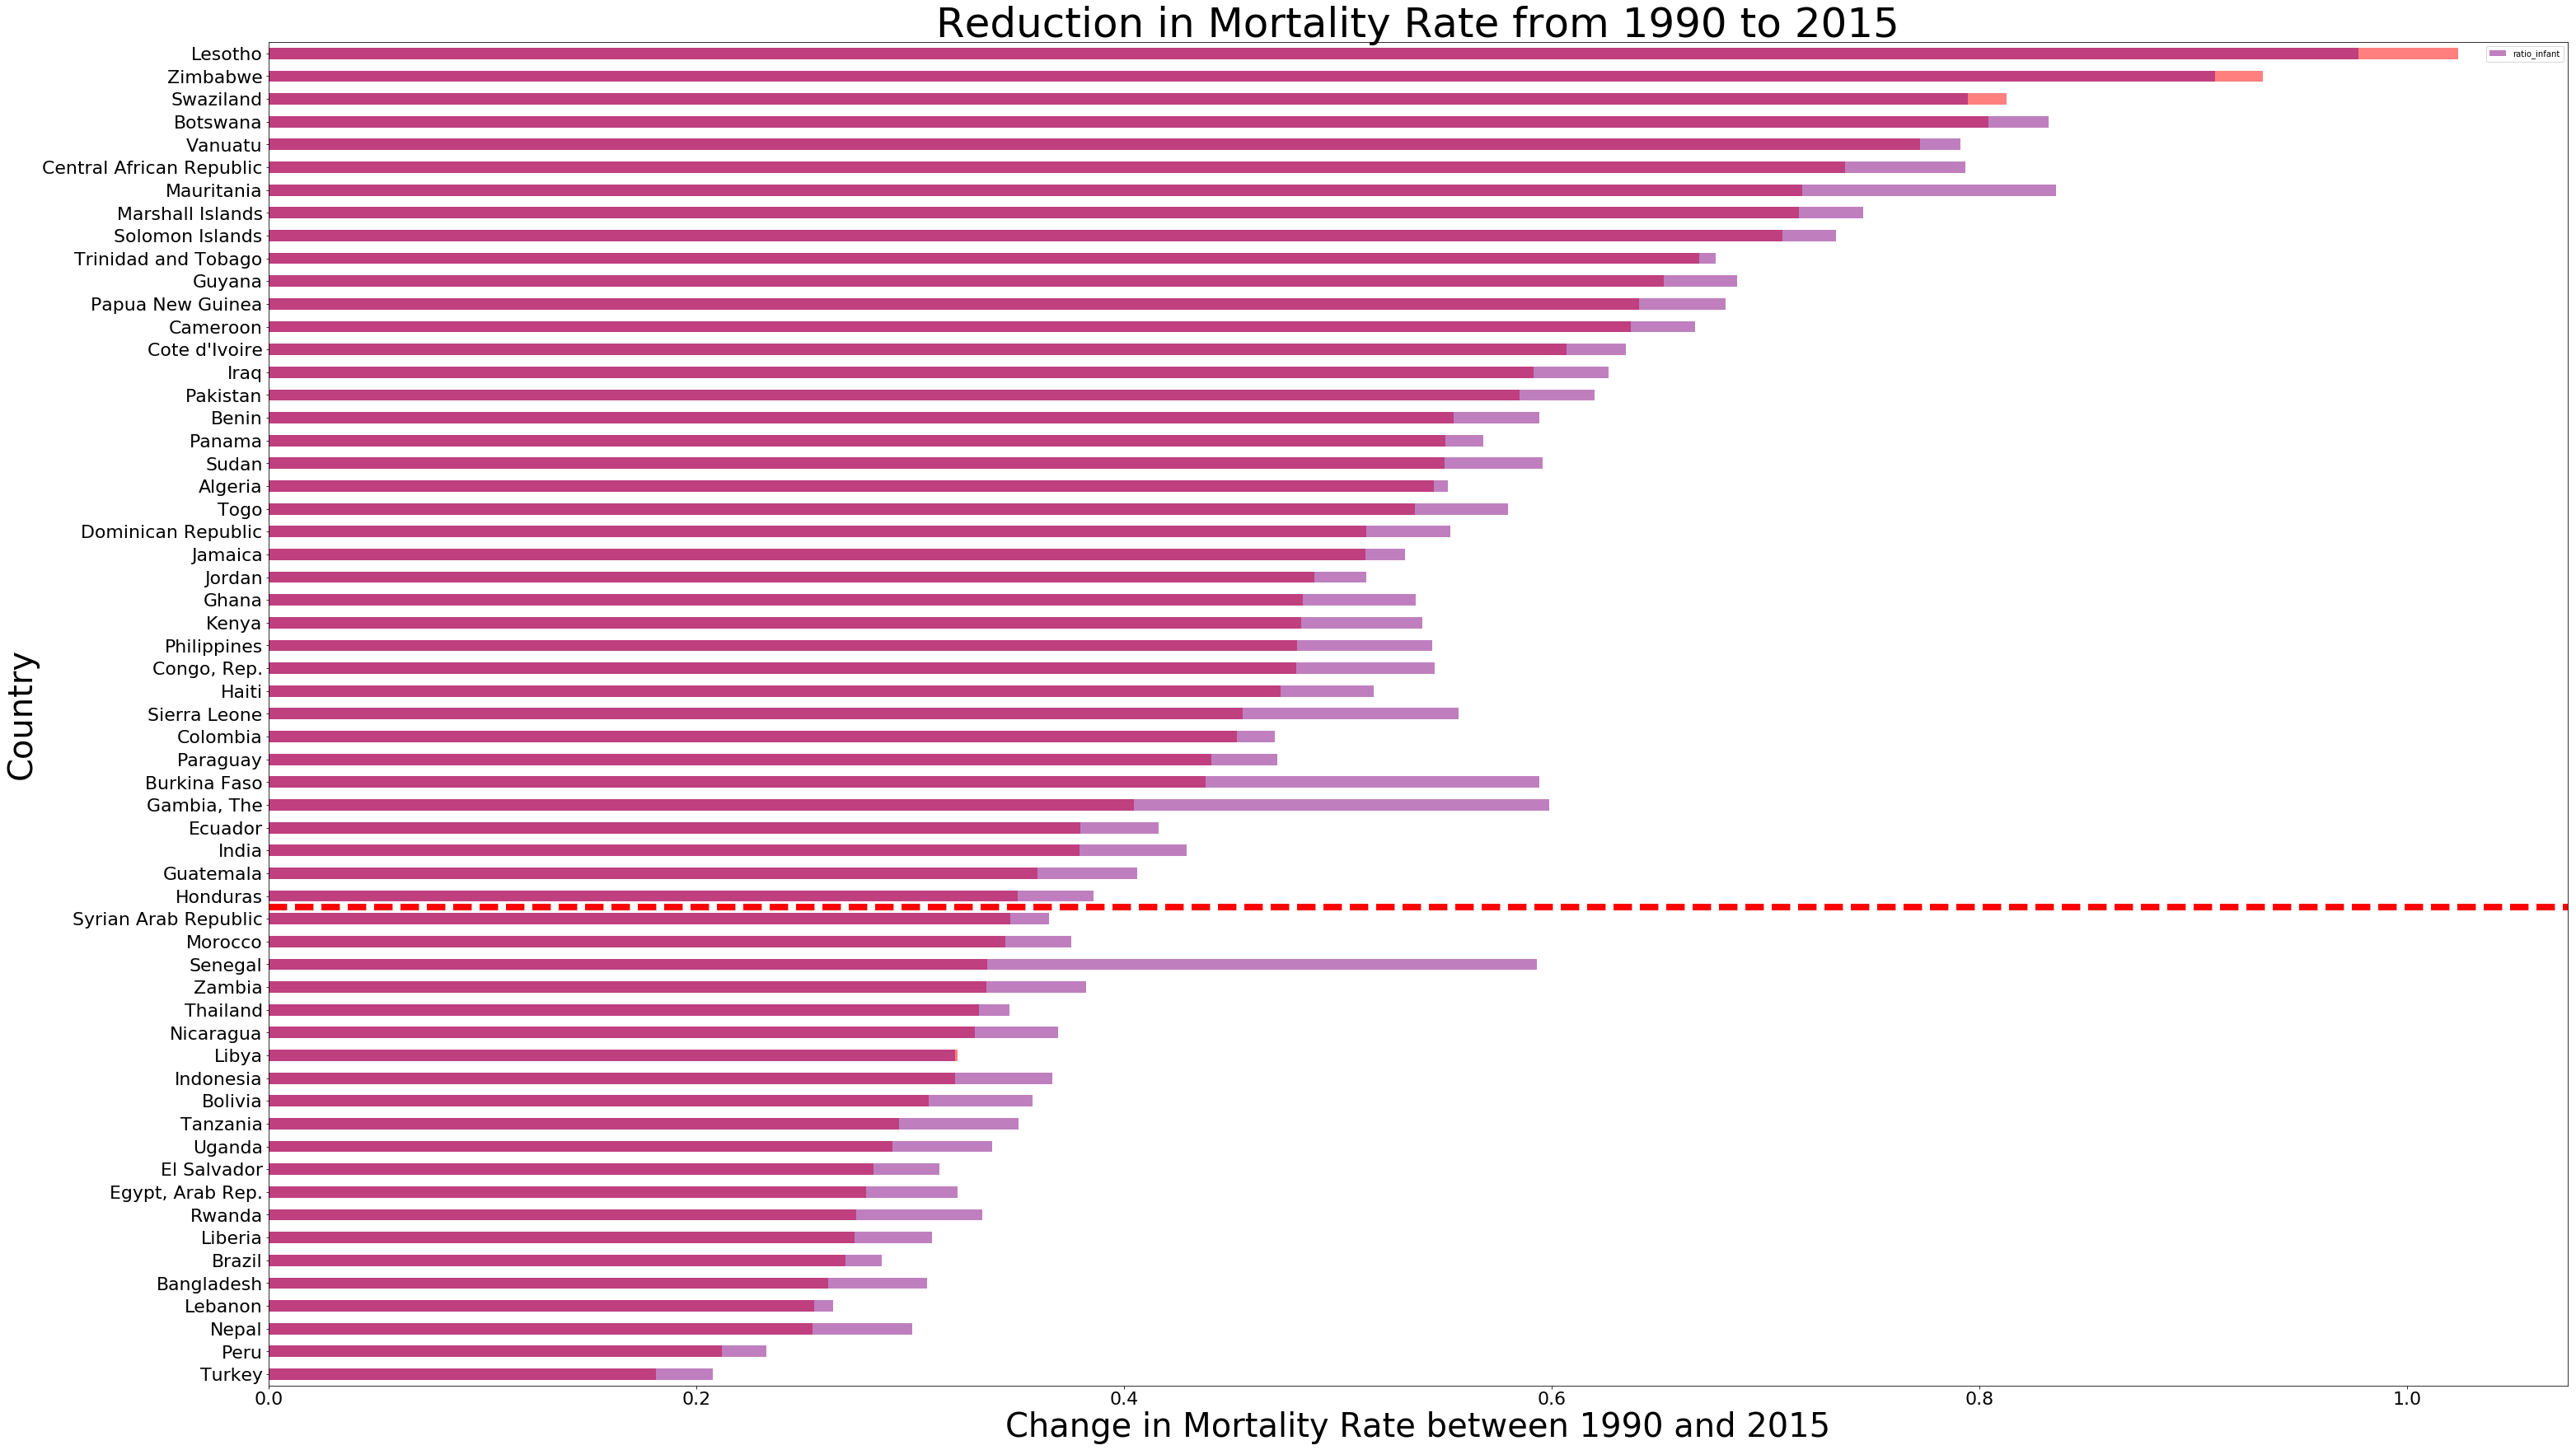

In [85]:
#Removing countries that had low under_5 and infant mortality in 1990
df_high_mortality = df_mortality.ix[lambda df_mortality: df_mortality['1990']  > 25]
df_high_infant_mortality = df_high_mortality.ix[lambda df_high_mortality: df_high_mortality['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)',:]
df_high_under_5_mortality = df_high_mortality.ix[lambda df_high_mortality: df_high_mortality['Indicator Name'] == 'Mortality rate, under-5 (per 1,000)',:]

df_high_infant_mortality['ratio_infant'] = [x/y for x,y in zip(df_high_infant_mortality['2015'], df_high_infant_mortality['1990'])]
df_high_under_5_mortality['ratio_under_5'] = [x/y for x,y in zip(df_high_under_5_mortality['2015'], df_high_under_5_mortality['1990'])]


#Calculate the reduced mortality between 1990 and 2015
#df_high_mortality['ratio'] = df_high_mortality['2015'] / df_high_mortality['1990']
#df_high_infant_mortality['ratio2'] = df_high_infant_mortality['2015'] / df_high_infant_mortality['1990']
df_high_infant_mortality.index = df_high_infant_mortality['Country Name']
df_high_under_5_mortality.index = df_high_under_5_mortality['Country Name']

df_combined_result = pd.concat([df_high_infant_mortality['Country Name'], df_high_infant_mortality[
    'ratio_infant'],df_high_under_5_mortality['ratio_under_5']], axis=1, join_axes=[df_high_infant_mortality.index])


#Sort by ratio value
df_sorted_mort = df_combined_result.sort(['ratio_under_5'], ascending=[1])
df_sorted_mort.index = df_sorted_mort['Country Name']

ax = df_sorted_mort['ratio_under_5'].plot(kind='barh', color='red', alpha=0.5)
ax2 = df_sorted_mort['ratio_infant'].plot(kind='barh',figsize=(50, 30), legend=True, fontsize=22, color='purple', alpha =0.5, stacked='True')
ax.set_title("Reduction in Mortality Rate from 1990 to 2015", fontsize=50)
ax.set_ylabel("Country", fontsize=40)
ax.set_xlabel("Change in Mortality Rate between 1990 and 2015", fontsize=40)
plt.axhline(y=20.5, linewidth=8, linestyle='dashed',color = 'r')









## 2. Time series Comparison of Zambia and Zimbabwe


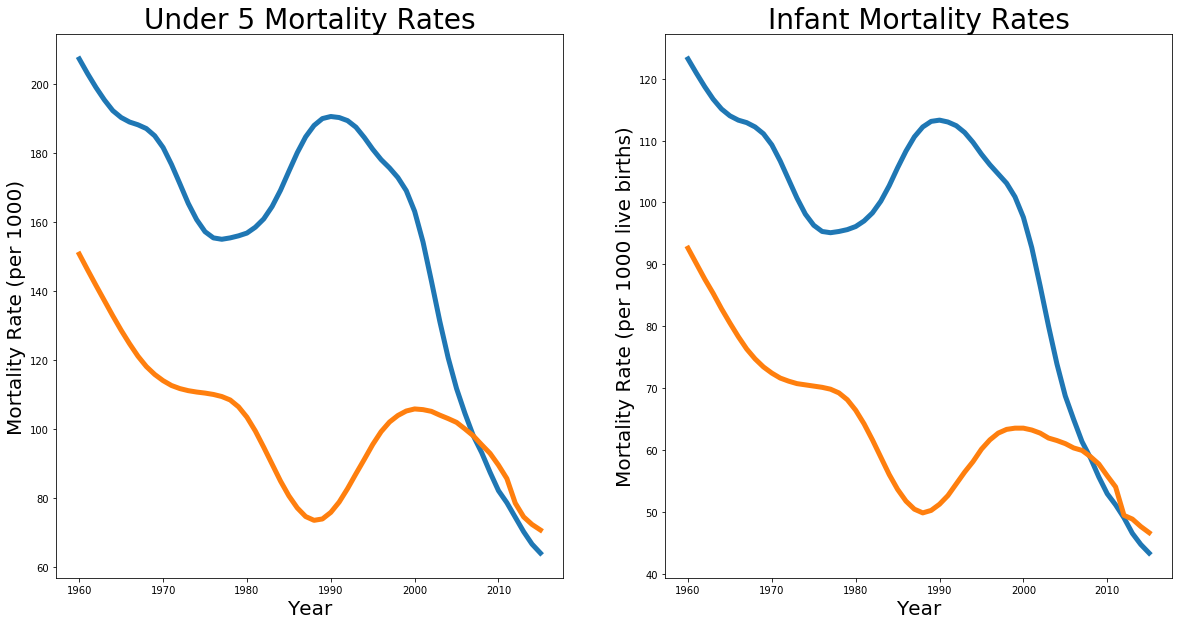

In [86]:

plt.figure(figsize=(20,10))


plt.subplot(1,2,1)

df_sorted_mort_Zambia = df_under_5.ix[lambda df: df_under_5['Country Name'] == 'Zambia',:]
df_mort_Zambia = df_sorted_mort_Zambia.drop(['Country Name', 'Indicator Name','Country Code', 'Indicator Code','full_count'], axis=1)
df_sorted_infant_Zambia = df_infant_mortality.ix[lambda df: df_infant_mortality['Country Name'] == 'Zambia',:]
df_infant_Zambia = df_sorted_infant_Zambia.drop(['Country Name','Country Code','Indicator Name', 'Indicator Code','full_count'], axis=1)

df_sorted_mort_Zimbabwe = df_under_5.ix[lambda df: df_under_5['Country Name'] == 'Zimbabwe',:]
df_mort_Zimbabwe = df_sorted_mort_Zimbabwe.drop(['Country Name', 'Indicator Name','Country Code','Indicator Code','full_count'], axis=1)
df_sorted_infant_Zimbabwe = df_infant_mortality.ix[lambda df: df_infant_mortality['Country Name'] == 'Zimbabwe',:]
df_infant_Zimbabwe = df_sorted_infant_Zimbabwe.drop(['Country Name','Country Code', 'Indicator Name','Indicator Code','full_count'], axis=1)


df_mort_Zambia2 =df_mort_Zambia.T
df_mort_Zimbabwe2 = df_mort_Zimbabwe.T
df_infant_Zambia2 = df_infant_Zambia.T
df_infant_Zimbabwe2 = df_infant_Zimbabwe.T

plt.plot(df_mort_Zambia2, linewidth=5)
plt.ylabel('Mortality Rate (per 1000)', fontsize=20)
plt.plot(df_mort_Zimbabwe2, linewidth=5)
plt.title('Under 5 Mortality Rates',fontsize=28)
plt.xlabel('Year', fontsize=20)

plt.subplot(1,2,2)
plt.plot(df_infant_Zambia2, linewidth=5)
plt.plot(df_infant_Zimbabwe2, linewidth=5)
plt.title('Infant Mortality Rates', fontsize=28)
plt.ylabel('Mortality Rate (per 1000 live births)', fontsize=20)
plt.xlabel('Year', fontsize=20)
#plt.legend()

plt.show()



###Analysis:  
Zambia's mortality rates went up between 1980 to a peak in 1990. After 1990, there was a substantial decrease in childhood and infant mortality rates ultimately leading to lower rates than Zimbabwe. Conversely, Zimbabwe was at an all-time low in mortality around 1990 before increasing again to 2000. Zimbabwe's mortality rates fell after the implementation of the Millenium Goals but not at the same rate as Zambia. The differences observed between 1990 and 2015 are partly due to the local minima in Zimbabwe and local maxima in mortality rates in Zambia occurring right around 1990. 

## Are there countries where infant mortality is decreasing more slowly than overall under-5 mortality?

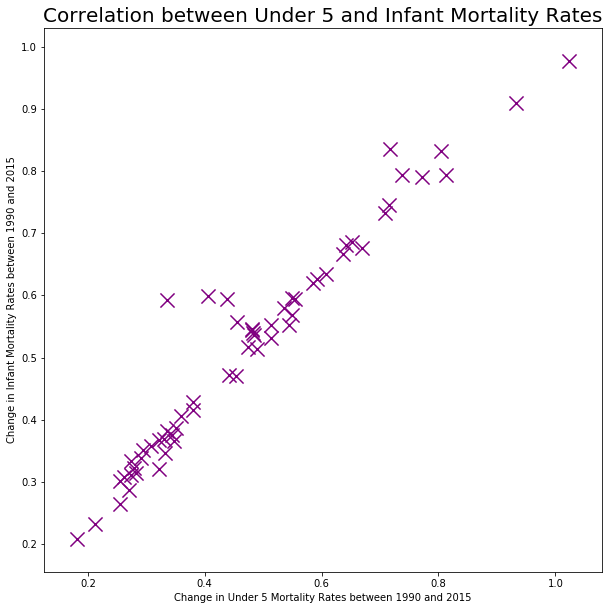

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(x = df_combined_result['ratio_under_5'], y = df_combined_result['ratio_infant'], color = 'purple', marker = 'x', s = 200)
plt.xlabel('Change in Under 5 Mortality Rates between 1990 and 2015')
plt.ylabel('Change in Infant Mortality Rates between 1990 and 2015')
plt.title('Correlation between Under 5 and Infant Mortality Rates', fontsize=20)
plt.show()

## Follow up questions
1. What factors primarily impact childhood mortality in Southern Africa? I'd like to add other datasets to look into different factors that affect the success of the Millenium Goals.
2. 